# Libraries and dataset

In [9]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

df = pd.read_csv(r'C:\Users\User\Desktop\Sales_data_zone_wise.csv')

In [2]:
# Displaying first 5 rows

df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
# Checking null values

df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

**Insight : There are no null values in the datset**

In [4]:
# Concise summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


**Insight : There are  29 rows and  5 columns in the dataset**

In [5]:
# Statistical summary of dataset

df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# Analysis

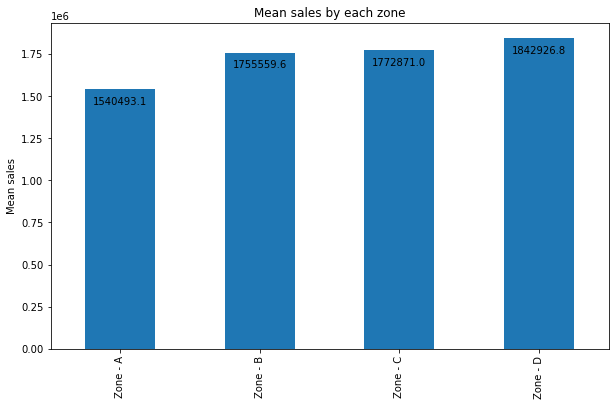

In [31]:
# Displaying mean sales of each zones

plt.figure(figsize=(10,6))
fig=df.mean().plot.bar()
plt.title('Mean sales by each zone')
plt.ylabel('Mean sales')
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

**Insight : From the mean sales generated by each zone, we can clearly see that the mean sales in the Zone - D is the highest and that of Zone - A is the lowest**

In [52]:
# Total sales in each zone

df["Total_Sales"]=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df.loc[:,['Month',"Total_Sales"]].head()

,Month,Total_Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328


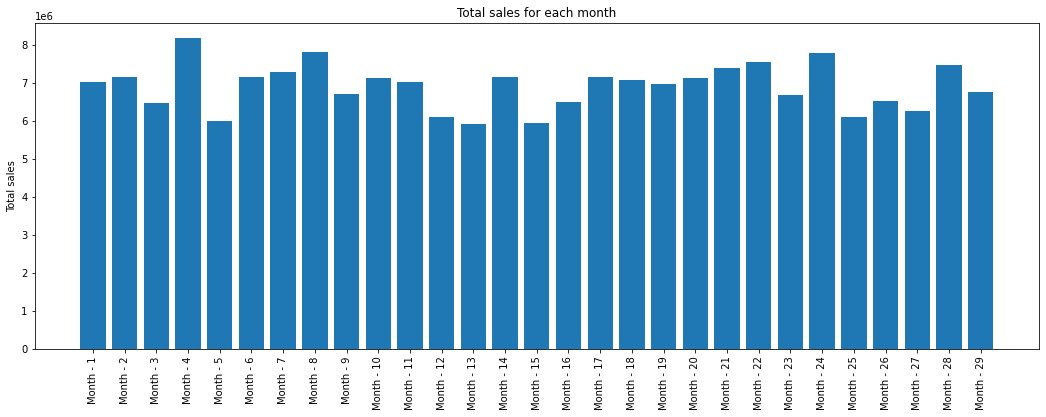

In [55]:
# Displaying total sales of each zone

plt.figure(figsize=(18,6))
plt.bar(df['Month'],df['Total_Sales'])
plt.xticks(rotation=90)
plt.title('Total sales for each month')
plt.ylabel('Total sales')
plt.show()

In [50]:
# Dropping Total_Sales column

df = df.drop(['Total_Sales'], axis = 1)
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


H0 : All the zones generate the same amount of sales
<br>H1 : There is difference between the amount of sales.

In [43]:
# One way anova

fvalue,pvalue=stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('f value is : ',fvalue,'P value is : ', pvalue)

f value is :  5.672056106843581 P value is :  0.0011827601694503335


**Insight : Since the p-value is less than .05, we reject the null hypothesis.
<br>This means we have sufficient evidence to say that there is a difference in sales**

Zone - A       AxesSubplot(0.125,0.749828;0.227941x0.130172)
Zone - B    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Zone - C    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Zone - D       AxesSubplot(0.125,0.593621;0.227941x0.130172)
dtype: object

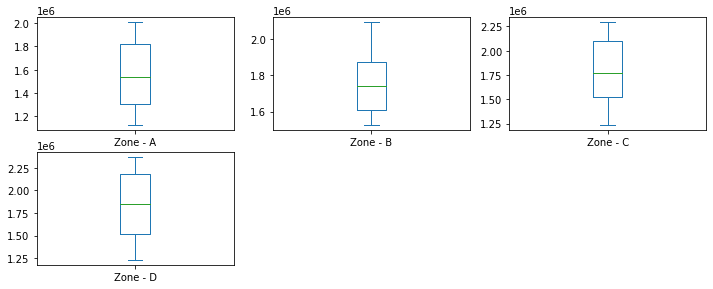

In [51]:
# Plotting in boxplots

df.plot(kind='box',subplots=True,figsize=(12,12),layout=(5,3))

**Insight : From the above box plots it is very clear that there are variances among the 4 zones, from this we can infer that all the zones do not generate the same amount of sales**